# Predicting the number of your customers

## Introduction

Suppose you have a shop. Every month you count the total number of your customers who bought from your shop. To simplify, we think of people buying one unit from your shop or nothing. 


Your customers are of two types:
* some are "returning" customers (i.e. they also bought last month) and 
* the others are new (did not buy last month)

So we will not worry about customers who, say, bought two months ago but not last month.

In this notebook, we first generate the data ourselves (so that you fully understand the structure of the data) and then we analyze this data.

## Importing libraries

We first import the libraries that we need.

In [1]:
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

## Model

We will generate the data with the following model.

Let $x_t$ denote the logarithm of the number of customers in period $t$. We assume that $x_t$ evolves over time as follows:

$$
x_t = \rho x_{t-1} + u_t
$$

where $u_t$ is normally distributed with mean $\mu_u \geq 0$ and standard deviation $\sigma_u \geq 0$ and $\rho \in [0,1]$. Hence, there is a fraction $\rho$ of previous period customers that return to buy this period and there is an inflow $u_t$ of new customers in period $t$.


-------------

**Exercise**

What is an advantage of defining $x_t$ as the logarithm of the number of customers? [hint: what would you need to "worry" about if $x_t$ denotes the number of customers?]

--------------

We assume that both $\mu$ and $\rho$ are a function of the price that is charged. If you charge a high price, fewer customers will return and also the inflow of new customers will be lower.

We generate data for 24 months. The code below starts from today and generates dates with a Monthly frequency. We define how $\rho$ and $\mu$ depend on the price $p$ that the shop charges in a period.

Finally, we create a pandas dataframe `df_customers` with this data. 

In [2]:
number_of_periods = 24
todays_date = datetime.datetime.now().date()
index = pd.date_range(todays_date-datetime.timedelta(31*number_of_periods), periods=number_of_periods, freq='M')
columns = ['log number of customers']

def mu(m,p):
    return m*(1-p)

def rho(r,p):
    return r*(1-p)

sigma = 1.0

p_0 = [0.2]
p_1 = [0.6]
period_0 = 18
period_1 = number_of_periods+1-period_0
vector_p = period_0*p_0 + period_1*p_1

x_0 = 10
x = []
x.append(x_0)
for t in range(1,number_of_periods+1):
    u = np.random.normal(mu(2,vector_p[t]), sigma)
    x.append(rho(0.5,vector_p[t])*x[t-1]+u)
    
df_customers = pd.DataFrame(x[1:], index=index, columns=columns)

In [3]:
df_customers.head()

,log number of customers
2015-09-30,3.146273
2015-10-31,2.321421
2015-11-30,2.942471
2015-12-31,4.496565
2016-01-31,4.644039


-----------

**Exercise**

Calculate the number of customers in each of the periods. Denote this column 'number of customers'. [hint: check the datacamp course on pandas or google "python pandas add column" to see how to add a new column in a dataframe; you may also want to check numpy's `exp` function]

-----------

In [4]:
# answer

df_customers['number of customers'] = np.exp(df_customers['log number of customers'])

-----------

**Exercise**

Calculate the average number of customers over the period of 24 months. [hint: check the datacamp course on pandas or google "python pandas average" to see how to calculate an average in a dataframe]

-----------

In [5]:
# answer

df_customers['number of customers'].mean()

25.679897256098126

-----------

**Exercise**

Calculate the median number of customers over the period of 24 months.

-----------

In [6]:
# answer

df_customers['number of customers'].median()

12.325043197549128

-----------

**Exercise**

What can you learn from the mean and the median for the number of customers next month? What do you learm from the fact that the median is lower than the mean?

-----------

Answer: you do not learn much as neither uses the time series structure of the data. As the median is below the mean, you do learn that the distribution in the number of customers is skewed.

-----------

**Exercise**

As the number of your customers is noisy (due to the random term $u_t$), it can be useful to smooth your observations. Calculate the moving average of your customers over 3 months and the moving average over 6 months. 

Create a column 'MA_3' for the moving average over 3 months and 'MA_6' for the moving average over 6 months.

[hint: depending on the version of pandas that you use, the command here is different. For older versions of pandas, look for something like pd.rolling_mean(). For newer versions of pandas, the command is a method on your dataframe, like df.rolling().mean(). In both cases you can specify the `window`.]

-----------

In [7]:
# answer

df_customers['MA_3'] = pd.rolling_mean(df_customers['number of customers'],window=3)
df_customers['MA_6'] = pd.rolling_mean(df_customers['number of customers'],window=6)

-----------

**Exercise**

Plot in one figure, the 'number of customers', 'MA_3' and 'MA_6'.

What is your prediction for the number of customers in the coming months. Why does this differ from the mean and median than you calculated above?

-----------

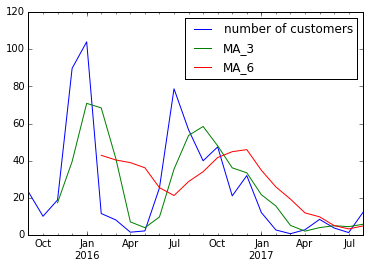

In [8]:
# answer

df_customers[['number of customers','MA_3','MA_6']].plot()

### answer

Looking at the figure, the prediction for the number of customers is below the mean and median calculated above. Although not easy to see in the figure, 5 or 6 customers seems a better prediction. You can also show the last couple of observations in the dataframe:

In [10]:
# follow up on answer

df_customers.tail()

,log number of customers,number of customers,MA_3,MA_6
2017-04-30,1.078972,2.941653,2.179024,11.982585
2017-05-31,2.140788,8.506136,4.082158,9.877331
2017-06-30,1.350616,3.859802,5.102531,5.180248
2017-07-31,0.341638,1.407251,4.591063,3.385044
2017-08-31,2.523455,12.471613,5.912889,4.997524


Next we want to calculate profits. For this we need to add prices to the dataframe. This is done with the following statement. Note that we created `vector_p` for 25 periods (check `len(vector_p)`), while we only have data for 24 periods. We use slicing to get 24 observations for the price [google "python slicing" if you want to know more about this].




In [12]:
df_customers['price'] = vector_p[1:]

In [13]:
df_customers.head()


,log number of customers,number of customers,MA_3,MA_6,price
2015-09-30,3.146273,23.249253,NaN,NaN,0.2
2015-10-31,2.321421,10.190140,NaN,NaN,0.2
2015-11-30,2.942471,18.962639,17.467344,NaN,0.2
2015-12-31,4.496565,89.708420,39.620400,NaN,0.2
2016-01-31,4.644039,103.963362,70.878140,NaN,0.2


We will assume that costs (per customer) equal 0.1.

Add a column `profits` to the dataframe of the form $(p-0.1)q$.


In [14]:
# answer

costs = 0.1
df_customers['profits'] = (df_customers['price']-costs)*df_customers['number of customers']

Finally, we plot profits against number of customers with the following command.

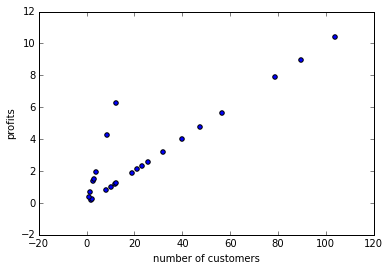

In [16]:
plt.scatter(df_customers['number of customers'],df_customers['profits'])
plt.xlabel('number of customers')
plt.ylabel('profits')
plt.show()

-----------

**Exercise**

Give an interpretation of the figure above.

-----------

### answer

The figure shows two straight lines. One with slope $p_0-costs = 0.2 - 0.1 =0.1$, the other with slope $p_1 - costs = 0.6 - 0.1 = 0.5$.

Clearly, with a higher price, profits increase faster with the number of customers. However, with a higher price the number of customers itself is lower. That is why the steeper line is "shorter": it only has observations with the number of customers below 20.